In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [21]:
df= pd.read_csv("data_set_for_decision_tree.csv")


In [23]:
df

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,United-States,<=50K
32557,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32558,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32559,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [37]:
for column in df.columns:
    if df[column].dtype == "object":
        df[column] = df[column].replace("?", df[column].mode()[0])

In [39]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [49]:
df

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,3,11,6,9,1,4,0,38,0
1,3,11,6,3,1,4,0,38,0
2,3,15,6,9,4,2,0,38,0
3,3,5,0,6,4,4,0,38,0
4,3,15,5,9,3,4,0,38,0
...,...,...,...,...,...,...,...,...,...
32556,3,15,4,10,1,4,1,38,0
32557,3,7,2,12,5,4,0,38,0
32558,3,11,2,6,0,4,1,38,1
32559,3,11,6,0,4,4,0,38,0


In [59]:
X =df[['workclass','education','marital.status','occupation','relationship','race','sex','native.country']]
y =df['income']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [61]:
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [67]:
y_pred = dt_model.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred)

0.8142177184093352

In [73]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4976
           1       0.63      0.53      0.57      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.72      0.73      6513
weighted avg       0.81      0.81      0.81      6513



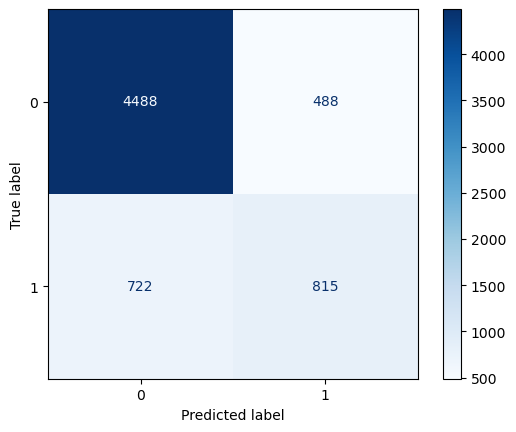

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

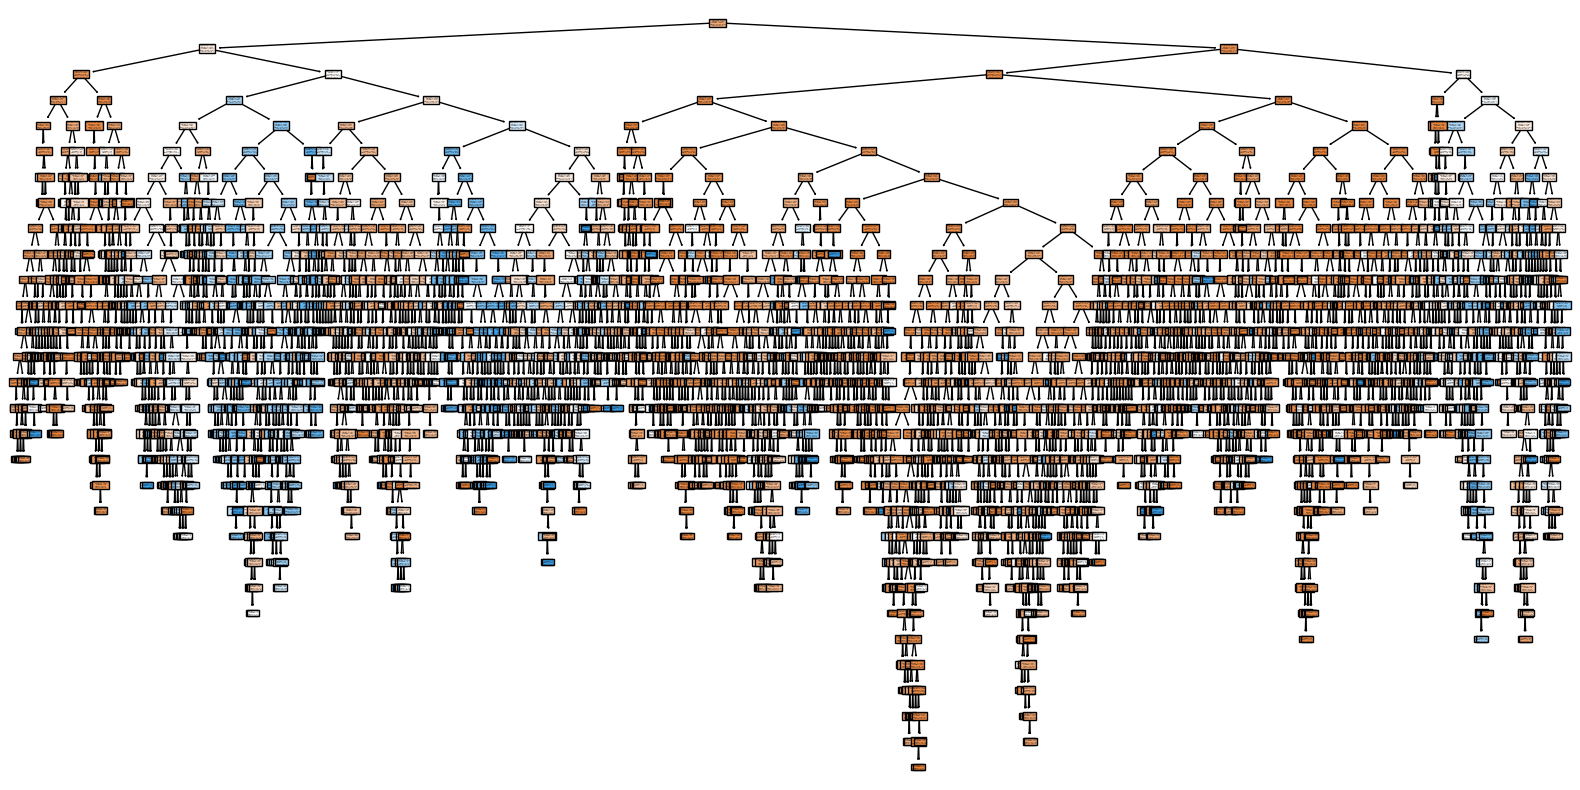

In [89]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()